In [7]:
!pip install gym==0.26.2

In [2]:
gym.__version__

'0.26.2'

In [21]:
import gym
import policy
import algorithms
import plot
import env
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange
from gym.wrappers import TimeLimit

def get_step(elapsed_steps):
    return elapsed_steps

def Q3_a():
    V_500k = algorithms.on_policy_mc_evaluation(gym.make("Blackjack-v1"), policy.default_blackjack_policy, 500000, 1)

    Used_A = np.zeros([21, 10])
    notUsed_A = np.zeros([21, 10])

    for i in V_500k.keys():
        player, dealer, ace = i
        if ace:
            Used_A[player - 1, dealer - 1] = V_500k[i]
        else:
            notUsed_A[player - 1, dealer - 1] = V_500k[i]

    plot.Q3_plot_value(Used_A, "Usable Ace After 500k")
    plot.Q3_plot_value(notUsed_A, "Non-usable Ace After 500k")

    V_10k = algorithms.on_policy_mc_evaluation(gym.make("Blackjack-v1"), policy.default_blackjack_policy, 10000, 1)

    Used_A = np.zeros([21, 10])
    notUsed_A = np.zeros([21, 10])

    for i in V_10k.keys():
        player, dealer, ace = i
        if ace:
            Used_A[player - 1, dealer - 1] = V_10k[i]
        else:
            notUsed_A[player - 1, dealer - 1] = V_10k[i]

    plot.Q3_plot_value(Used_A, "Usable Ace After 10k")
    plot.Q3_plot_value(notUsed_A, "Non-usable Ace After 10k")
    plt.show()

def Q3_b():
    Q, policy = algorithms.on_policy_mc_control_es(gym.make("Blackjack-v1"), 500000, 1)

    Used_A = np.zeros([21, 10])
    notUsed_A = np.zeros([21, 10])
    UA_Policy = np.zeros([21, 10])
    nUA_Policy = np.zeros([21, 10])

    for i in Q.keys():
        player, dealer, ace = i
        if ace:
            Used_A[player - 1, dealer - 1] = np.max(Q[i])
            UA_Policy[player - 1, dealer - 1] = np.argmax(Q[i])

        else:
            notUsed_A[player - 1, dealer - 1] = np.max(Q[i])
            nUA_Policy[player - 1, dealer - 1] = np.argmax(Q[i])


    plot.Q3_plot_policy(UA_Policy, "The Optimal Policy with usable Ace")
    plot.Q3_plot_policy(nUA_Policy, "The Optimal Policy with non-usable Ace")
    plot.Q3_plot_value(Used_A, "State-value with Usable Ace")
    plot.Q3_plot_value(notUsed_A, "State-value with Non-usable Ace")
    plt.show()

def Q4_a():
    env.register_env()
    num_episodes = 10000
    trials = 1

    # state, info= FRoom_env.reset()
    # for i in range(5):
    returns = algorithms.on_policy_mc_control_epsilon_soft(gym.make('FourRooms-v0'), num_episodes, 0.99, 0.1)

    plt.figure()
    plt.plot(returns)
    plt.show()



def Q4_b():
    env.register_env()
    FRoom_env = gym.make('FourRooms-v0')
    # wrapped_env = FlattenObservation(env)
    # print(FRoom_env._elapsed_steps)

    num_episodes = 10000
    trials = 10
    epsilon = [0.1, 0.02, 0]
    labels = ['ε = 0.1', 'ε = 0.02', 'ε = 0']
    colors = ['tab:blue', 'tab:green', 'tab:red']
    plt.figure()


    for i in range(len(epsilon)):
        return_t = []
        for t in range(trials):
            returns = algorithms.on_policy_mc_control_epsilon_soft(FRoom_env, num_episodes, 0.99, epsilon[i])
            return_t.append(returns)

        err = 1.96 * np.std(returns, 0) / np.sqrt(trials)
        return_avr = np.average(return_t, 0)
        # print(err)
        # print(return_avr)
        plt.plot(return_avr, label = labels[i], color = colors[i])
        plt.fill_between(np.arange(num_episodes), return_avr + err, return_avr - err, alpha = 0.3, color = colors[i])
        # plt.title(f"")

    plt.legend()
    plt.show()

def Q6_a():
    racetracks.register_env()
    labels = ['track0', 'track1']
    colors = ['tab:blue', 'tab:green']

    plt.figure()
    for i in range(2):
        RTracks_env = gym.make('Racetrack-v0', track_map = i)
        # print(RTracks_env.reset())

        returns = algorithms.on_policy_mc_control_epsilon_soft_race(RTracks_env, 2000, 0.9999, 0.1)    
        plt.plot(returns, label = labels[i], color = colors[i])
    plt.legend()
    plt.show()

Episode: 100%|██████████████████████████| 10000/10000 [00:01<00:00, 9385.20it/s]


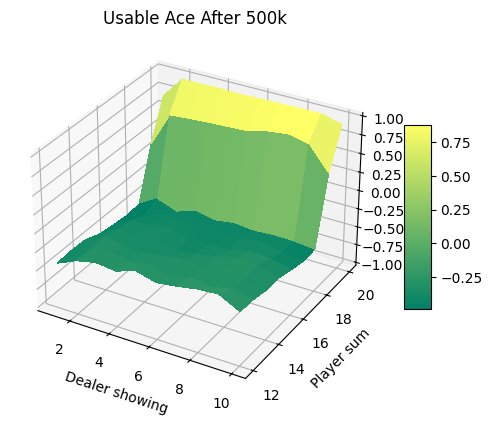

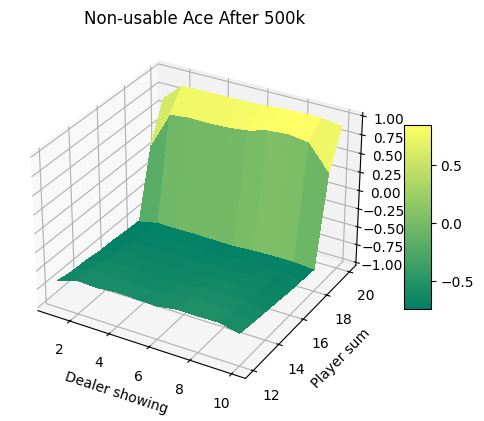

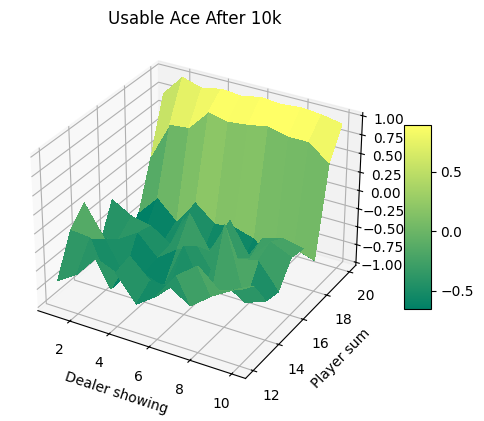

In [10]:
Q3_a()

Episode: 100%|████████████████████████| 500000/500000 [00:57<00:00, 8716.94it/s]


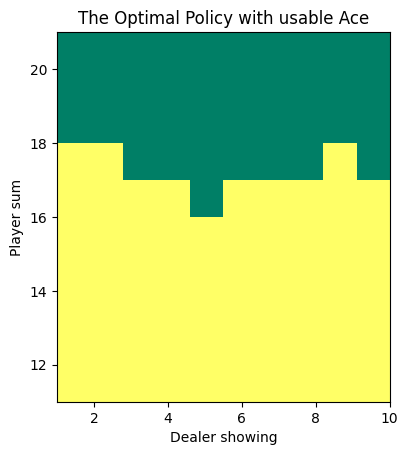

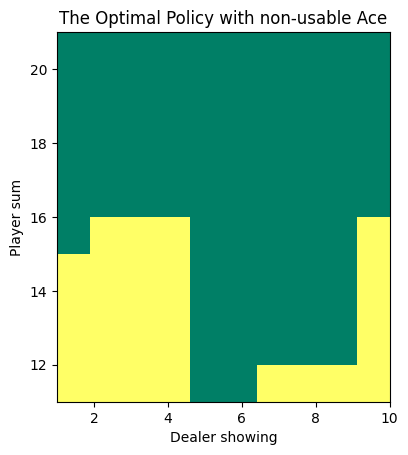

In [14]:
Q3_b()

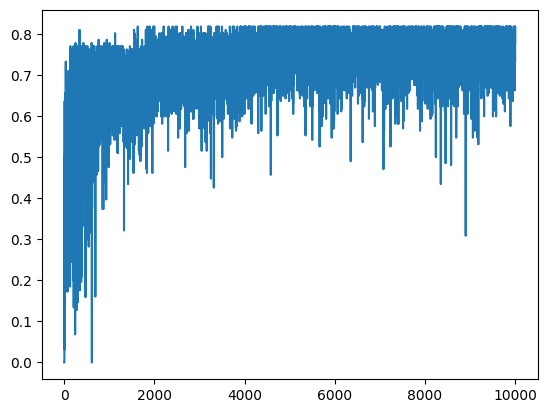

In [9]:
# Goal at (10,10)
Q4_a()

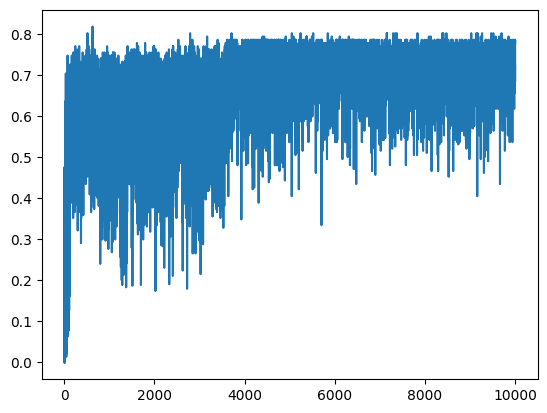

In [7]:
# Random Goal at (3,10)
Q4_a()

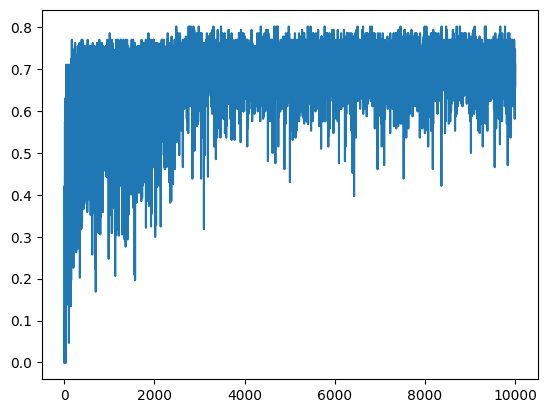

In [8]:
# Random Goal at (10,3)
Q4_a()

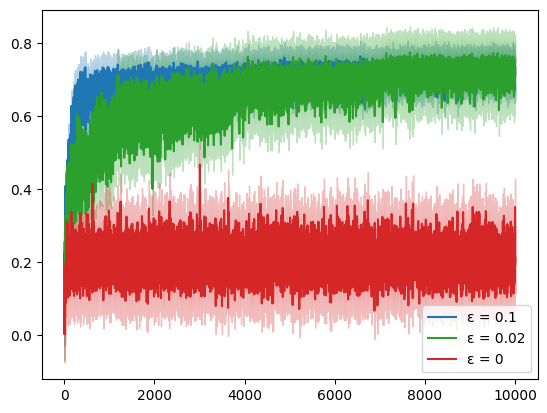

In [15]:
Q4_b()

In [22]:
Q6_a()

/home/pengkai/anaconda3/envs/gym/lib/python3.11/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment Racetrack-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


AttributeError: module 'algorithms' has no attribute 'on_policy_mc_control_epsilon_soft_race'

<Figure size 640x480 with 0 Axes>